In [53]:
import datetime as dt

from deep_hvac.behavioral_clone import TrajDataset, DataLoader
from deep_hvac.simulator import SimEnv

import matplotlib.pyplot as plt
import pandas as pd
import torch

In [15]:
trajs = torch.load('fixtures/expert-traj-summer.pt')

In [34]:
dataset = TrajDataset(trajs)
dataloader = DataLoader(dataset,
                        batch_size=10000,
                        shuffle=True)

In [35]:
for data in dataloader:
    pass

In [52]:
len(dataloader.dataset)

7200

In [38]:
data['state'].shape

torch.Size([7200, 1, 22])

<AxesSubplot:xlabel='timestamps'>

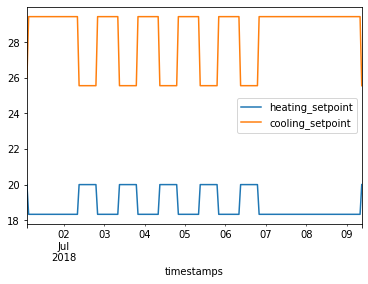

In [61]:
def states_to_dataframe(state_obs):
    state_obs = state_obs.squeeze(1)
    hours = state_obs[:, SimEnv.state_idx['hour']]
    months = state_obs[:, SimEnv.state_idx['month']]
    days = state_obs[:, SimEnv.state_idx['day']]
    occupancy = state_obs[SimEnv.state_idx['occupancy_ahead_0'], :]
    timestamps = [
        dt.datetime(2018, int(month), int(day), int(hour))
        for month, day, hour in zip(months, days, hours)
    ]
    return pd.DataFrame({
        'timestamps': timestamps,
        'heating_setpoint': state_obs[:, 
                                      SimEnv.state_idx['heating_setpoint']],
        'cooling_setpoint': state_obs[:, 
                                      SimEnv.state_idx['cooling_setpoint']]
    })
    
frame = states_to_dataframe(data['state'])
frame.groupby('timestamps').mean().iloc[0:200].plot()

In [65]:
import calendar

{month.lower(): index for index, month in enumerate(calendar.month_abbr) if month}

{'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'sep': 9,
 'oct': 10,
 'nov': 11,
 'dec': 12}